Testing `mushi` with `stdpopsim` simulations
==
- Plots using nextflow pipeline output in `output/` directory
- Using the zigzag $\eta$, and a $\boldsymbol\mu$ with two dynamic mutation types

In [1]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from mushi.utils import prf

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

## True histories
$\eta$ and $\boldsymbol\mu$ used in the simulation

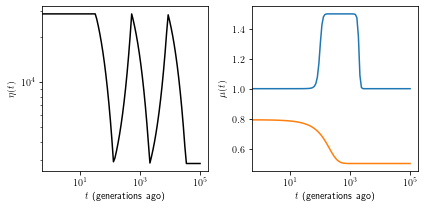

In [2]:
eta_true = pickle.load(open('output/eta.pkl', 'rb'))
mu_true = pickle.load(open('output/mu.pkl', 'rb'))

plt.figure(figsize=(6, 3))
plt.subplot(121)
eta_true.plot(c='k')
plt.subplot(122)
mu_true.plot((0, 1))
plt.show()

## $\eta$ parameter sweep
Load inference results of parameter sweep over $\alpha_1$ and $\alpha_2$

In [3]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/eta_sweep/*/dat*')):
    alpha_params, beta_params, ksfs = pickle.load(open(f, 'rb'))
    loss = float(-prf(ksfs.mu.Z, ksfs.X, ksfs.L))
    heatmap_data.append([alpha_params['alpha_tv'], alpha_params['alpha_spline'], loss, ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

Plot 2D loss elbow heatmap, and inference results

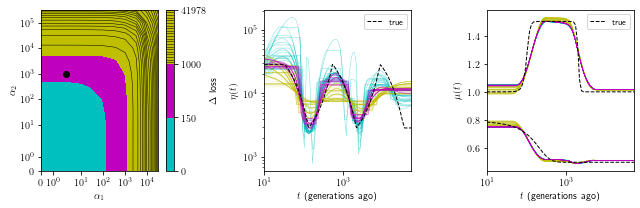

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20, colors='k', linewidths=.5)
heatmap = plt.contourf(contour, levels=[0, 150, 1000, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
# annotate point used for other sweep
plt.plot(2e0, 1e3, 'ko')
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$\alpha_2$')

for i, data in enumerate(heatmap_data):
    alpha_tv, alpha_spline, relative_loss, ksfs = data
        
    if heatmap.levels[1] <= relative_loss <= heatmap.levels[2]:
        alpha = .9
        zorder = 2
        color = 'm'
        lw = 0.2
    elif relative_loss <= heatmap.levels[1]:
        alpha = .5
        zorder = 1
        color = 'c'
        lw = .5
    else:
        alpha = .25
        zorder = 1
        color = 'y'
        lw = .5

    plt.sca(axes[1])
    ksfs.eta.plot(alpha=alpha, zorder=zorder, lw=lw, c=color)

    plt.sca(axes[2])
    ksfs.mu.plot((0, 1), alpha=alpha, zorder=zorder, lw=lw, c=color)

    
plt.sca(axes[1])
eta_true.plot(c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
                 
plt.sca(axes[2])
mu_true.plot((0,), c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
mu_true.plot((1,), c='k', alpha=1, ls='--', lw=1, zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])

plt.tight_layout()
plt.savefig('plots/eta_sweep.pdf')

## $\boldsymbol\mu$ parameter sweep
Load inference results of parameter sweep over $\beta_1$ and $\beta_2$

In [5]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/mu_sweep/*/dat*')):
    alpha_params, beta_params, ksfs = pickle.load(open(f, 'rb'))
    if beta_params['beta_tv'] <= 3e3:# and beta_params['beta_spline'] <= 1e6:
        loss = float(-prf(ksfs.mu.Z, ksfs.X, ksfs.L))
        heatmap_data.append([beta_params['beta_tv'], beta_params['beta_spline'], loss, ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

Plot 2D loss elbow heatmap, and inference results

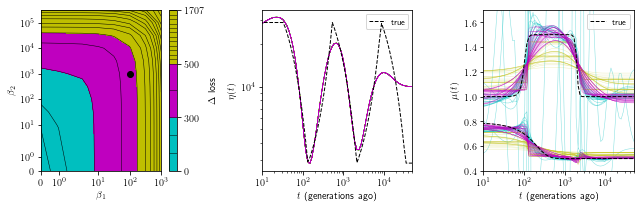

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20, colors='k', linewidths=.5)
heatmap = plt.contourf(contour, levels=[0, 300, 500, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
# annotate point used for other sweep
plt.plot(1e2, 1e3, 'ko')
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')

for i, data in enumerate(heatmap_data):
    beta_tv, beta_spline, relative_loss, ksfs = data
        
    if heatmap.levels[1] <= relative_loss <= heatmap.levels[2]:
        alpha = .9
        zorder = 2
        color = 'm'
        lw = 0.2
    elif relative_loss <= heatmap.levels[1]:
        alpha = .5
        zorder = 1
        color = 'c'
        lw = .5
    else:
        alpha = .25
        zorder = 1
        color = 'y'
        lw = .5

    plt.sca(axes[1])
    ksfs.eta.plot(alpha=alpha, zorder=zorder, lw=lw, c=color)

    plt.sca(axes[2])
    ksfs.mu.plot((0, 1), alpha=alpha, zorder=zorder, lw=lw, c=color)

    
plt.sca(axes[1])
eta_true.plot(c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
                 
plt.sca(axes[2])
mu_true.plot((0,), c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
mu_true.plot((1,), c='k', alpha=1, ls='--', lw=1, zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
plt.ylim([0.4, 1.7])

plt.tight_layout()
plt.savefig('plots/mu_sweep.pdf')

## Point estimates
Make a tidy plot with the regularization parameters indicated by points in previous plots

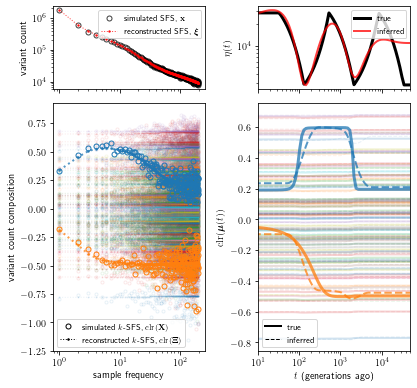

In [7]:
ksfs = pickle.load(open('output/mush/folded_False/0.00/dat.pkl', 'rb'))[2]

fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(5.9, 5.5), gridspec_kw={'height_ratios': [1, 3]})

plt.sca(axes[0, 0])
ksfs.plot_total(kwargs=dict(ls='', alpha=0.75, marker='o', ms=5, mfc='none', c='k', label=r'simulated SFS, $\mathbf x$'),
                line_kwargs=dict(c='r', ls=':', marker='.', ms=3, alpha=0.75, lw=1, label=r'reconstructed SFS, $\boldsymbol{\xi}$'),
                fill_kwargs=dict(alpha=0))
plt.yscale('log')
plt.xlabel(None)
plt.legend(fontsize=8)

plt.sca(axes[1, 0])
ksfs.plot(range(2, len(ksfs.mutation_types)), clr=True, kwargs=dict(alpha=0.1, ls='', marker='o', ms=3, mfc='none', rasterized=True),
          line_kwargs=dict(ls=':', marker='.', ms=2, alpha=0.1, lw=1, rasterized=True))
ksfs.plot((0,), clr=True, kwargs=dict(ls='', marker='o', ms=5, mfc='none', c='C0'),
          line_kwargs=dict(ls=':', marker='.', ms=3, alpha=0.75, lw=2, c='C0'))
ksfs.plot((1,), clr=True, kwargs=dict(ls='', marker='o', ms=5, mfc='none', c='C1'),
          line_kwargs=dict(ls=':', marker='.', ms=3, alpha=0.75, lw=2, c='C1'))
plt.ylabel('variant count composition')
legend_elements = [Line2D([0], [0], ls='', marker='o', ms=5, mfc='none', color='k', label=r'simulated $k$-SFS, $\mathrm{clr}(\mathbf X)$'),
                   Line2D([0], [0], ls=':', marker='.', color='k', ms=3, lw=1, label=r'reconstructed $k$-SFS, $\mathrm{clr}(\boldsymbol\Xi)$')]
plt.legend(handles=legend_elements, loc='lower left', fontsize=8)

plt.sca(axes[0, 1])
eta_true.plot(c='k', alpha=1, lw=3, label='true')
ksfs.eta.plot(c='r', alpha=0.75, lw=2, label='inferred')
plt.legend(fontsize=8, loc='upper right')
plt.xlabel(None)

plt.sca(axes[1, 1])
mu_true.plot(range(2, len(ksfs.mutation_types)), alpha=0.2, lw=2, rasterized=True, clr=True)
plt.gca().set_prop_cycle(None)
ksfs.mu.plot(range(2, len(ksfs.mutation_types)), alpha=0.1, lw=1, ls='--', rasterized=True, clr=True)
mu_true.plot((0,), alpha=0.75, lw=3, c='C0', clr=True)
ksfs.mu.plot((0,), alpha=0.75, lw=2, c='C0', clr=True, ls='--')
mu_true.plot((1,), alpha=0.75, lw=3, c='C1', clr=True)
ksfs.mu.plot((1,), alpha=0.75, lw=2, c='C1', clr=True, ls='--')
plt.ylabel(r'$\mathrm{clr}(\boldsymbol{\mu}(t))$')
legend_elements = [Line2D([0], [0], color='k', lw=2, label='true'),
                   Line2D([0], [0], color='k', ls='--', lw=1, label='inferred')]
plt.legend(handles=legend_elements, loc='lower left', fontsize=8)
plt.xlim([1e1, 5e4])

plt.tight_layout()
plt.savefig('plots/mush.pdf')

## Impact of ancestral state misidentification, frequency masking, and SFS folding

- Several levels of ancestral misid (0.00, 0.01, 0.05, and 0.10).

- The upper panels show how eta inference behaves using the unfolded SFS with masking of top 20 frequencies in SFS, for the various misid rates (colors). The black SFS is the folded SFS, and the solid black eta inference uses your folded=True mode. Unfolded+masked eta inference looks about as good as folded inference for low (<10%) misid rates.

- For the mu inference step, we can’t fold the k-SFS (since that would confuse mutation types), but we can ask how inference is impacted by misid, and if this looks different if we used the folded SFS for the previous eta inference step or not.

- The colors in the bottom panels correspond to the same misid rate as in the top panels. Solid lines show mu histories inferred after unfolded eta inference, and the dotted lines instead used the folded eta step. Mu inference is affected by misid rates >= 5%, and this does not look different between folded Vs unfolded eta inference.

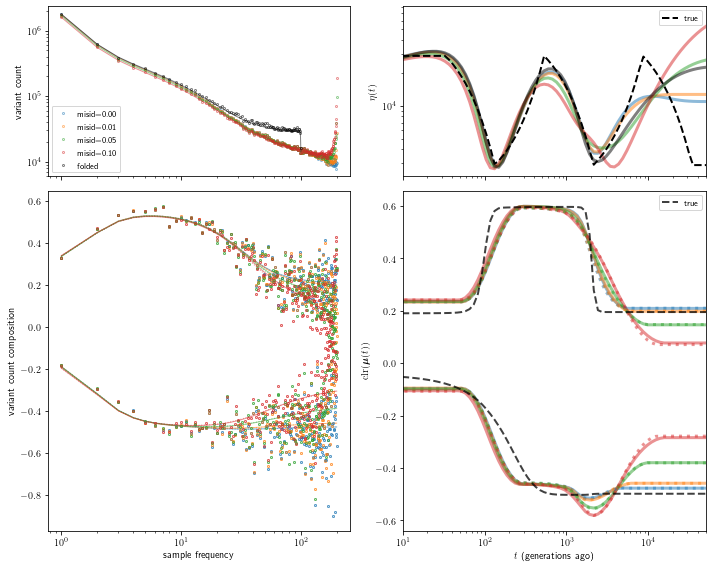

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col',
                         figsize=(10, 8), gridspec_kw={'height_ratios': [1, 2]})
for folded in (False, True):
    for i, f in enumerate(sorted(glob.glob(f'output/mush/folded_{folded}/*/dat.pkl'))):
        ksfs = pickle.load(open(f, 'rb'))[2]
        p_misid = f.split('/')[3]
        if i == 0 or not folded:
            plt.sca(axes[0, 0])
            ksfs.plot_total(kwargs=dict(alpha=0.5, ls='', marker='o', ms=2, mfc='none',
                                        c=('k' if folded else f'C{i}'),
                                        label=('folded' if folded else f'misid={p_misid}')),
                            line_kwargs=dict(c=('k' if folded else f'C{i}'), alpha=0.5, lw=1),
                            fill_kwargs=dict(alpha=0),
                            folded=folded)

            plt.sca(axes[0, 1])
            ksfs.eta.plot(c=('k' if folded else f'C{i}'),
                          alpha=0.5, lw=3)
            
        plt.sca(axes[1, 0])
        ksfs.plot((0,), clr=True, kwargs=dict(alpha=0.5, ls='', marker='o', ms=2, mfc='none', c=f'C{i}'),
                  line_kwargs=dict(alpha=0.5, lw=1, c=f'C{i}',
                                   ls=(':' if folded else '-')))
        ksfs.plot((1,), clr=True, kwargs=dict(alpha=0.5, ls='', marker='o', ms=2, mfc='none', c=f'C{i}'),
                  line_kwargs=dict(alpha=0.5, lw=1, c=f'C{i}',
                                   ls=(':' if folded else '-')))

        plt.sca(axes[1, 1])
        ksfs.mu.plot((0,), alpha=0.5, lw=3, c=f'C{i}', clr=True,
                     ls=(':' if folded else '-'))
        ksfs.mu.plot((1,), alpha=0.5, lw=3, c=f'C{i}', clr=True,
                     ls=(':' if folded else '-'))

plt.sca(axes[0, 0])
plt.yscale('log')
plt.xlabel(None)
plt.legend(fontsize=8, loc='lower left')

plt.sca(axes[1, 0])
plt.ylabel('variant count composition')

plt.sca(axes[0, 1])
eta_true.plot(c='k', ls='--', alpha=1, lw=2, label='true')
plt.legend(fontsize=8)
plt.xlabel(None)

plt.sca(axes[1, 1])
mu_true.plot((0,), ls='--', alpha=0.75, lw=2, c='k', clr=True, label='true')
mu_true.plot((1,), ls='--', alpha=0.75, lw=2, c='k', clr=True)
plt.ylabel(r'$\mathrm{clr}(\boldsymbol{\mu}(t))$')
plt.legend(fontsize=8)
plt.xlim([1e1, 5e4])

plt.tight_layout()
plt.savefig(f'plots/mush_folded.pdf')